## Problem Set 1, due January 18th at 11:59pm 


#### Before You Start
For this problem set, you should download the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser. You should also make sure the following libraries load correctly.

In [1]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

import statsmodels.formula.api as smf

Your numpy version: 1.18.5 (need at least 1.7.1)
Your SciPy version:  1.5.0 (need at least 0.12.0)
Your Pandas version:  1.0.5 (need at least 0.11.0)
Your Mapltolib version:  3.2.2 (need at least 1.2.1)
Your Scikit-Learn version: 0.23.1 (need at least 0.13.1)


#### Instructions: 
 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 

This data set uses the NYCFlights13 dataset. You can download the dataset from flights data that you downloaded from canvas (flights.zip).

Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.sample(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
119719,119720,2013,2,10,2026.0,26.0,2205.0,28.0,EV,N13913,4106,EWR,GSO,69.0,445,20.0,26.0
302834,302835,2013,8,25,722.0,-8.0,803.0,-31.0,US,N948UW,1821,LGA,PHL,27.0,96,7.0,22.0
115191,115192,2013,2,5,1547.0,-2.0,1642.0,-23.0,UA,N54241,1116,EWR,BOS,35.0,200,15.0,47.0
2798,2799,2013,1,4,710.0,-5.0,1009.0,-18.0,UA,N76505,1526,EWR,RSW,160.0,1068,7.0,10.0
188202,188203,2013,4,25,1146.0,72.0,1346.0,63.0,EV,N13123,4694,EWR,IND,104.0,645,11.0,46.0
180575,180576,2013,4,17,1027.0,-3.0,1138.0,-4.0,EV,N17108,4249,EWR,IAD,44.0,212,10.0,27.0
228398,228399,2013,6,7,1721.0,1.0,1920.0,-22.0,UA,N455UA,483,EWR,PHX,274.0,2133,17.0,21.0
291727,291728,2013,8,13,1241.0,1.0,1357.0,0.0,EV,N17169,6054,EWR,IAD,45.0,212,12.0,41.0
54125,54126,2013,10,30,745.0,-10.0,1100.0,-10.0,AA,N351AA,59,JFK,SFO,356.0,2586,7.0,45.0
64478,64479,2013,11,10,1343.0,0.0,1531.0,-20.0,US,N750UW,1802,JFK,CLT,88.0,541,13.0,43.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

#### Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# Your code here
flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape

(3923, 17)

-- There are 3923 flights were from NYC airports to Seattle in 2013. -- 

(b) How many airlines fly from NYC to Seattle?

In [7]:
# Your code here
len(flights_df1.carrier.unique())

5

 --  There are total 5 airlines. -- 

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
# Your code here
flights_df1.tailnum.nunique()

935

 -- There are total 935 unique air planes. -- 

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
# Your code here
flights_df1.arr_delay.mean()

-1.0990990990990992

 --  The average arrival delay for flights from NYC to Seattle is -1.10 minutes. -- 

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [10]:
# Your code here

print(len(flights_df1[ flights_df1.origin=='LGA'])/len(flights_df1))
print(len(flights_df1[ flights_df1.origin=='EWR'])/len(flights_df1))
print(len(flights_df1[ flights_df1.origin=='JFK'])/len(flights_df1))

0.0
0.46673464185572267
0.5332653581442773


In [11]:
df_og = flights_df1.groupby(["origin"])
df_og.size()/len(flights_df1)

origin
EWR    0.466735
JFK    0.533265
dtype: float64

 --  The proportion of flights to Seattle from LGA, EWR and JFK airports is 0, 0.467 and 0.533 -- 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [12]:
# Your code here

# Departure delay
flights_df["date"] = flights_df["month"]*100 + flights_df["day"]
means = flights_df.groupby(["date"]).mean()
dep_delay_max = means[means.dep_delay == means.dep_delay.max()]
print(dep_delay_max.month)

arr_delay_max = means[means.arr_delay == means.arr_delay.max()]
print(arr_delay_max.month)

date
308    3.0
Name: month, dtype: float64
date
308    3.0
Name: month, dtype: float64


-- Largest departure and arrival delay are happend on the same date: March 8th.--

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [13]:
# Your code here

 -- March 8th, since it has the longest delay(both departure delay and arrival delay).--

(c) Are there any seasonal patterns in departure delays for flights from NYC?

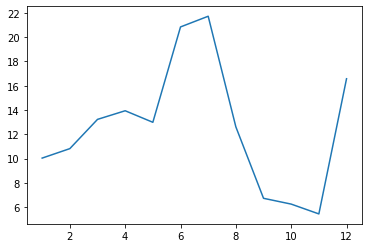

In [14]:
# Your code here

means = flights_df.groupby(["month"]).mean()
plt.plot(means.dep_delay)

-- From the plot, it seems that there is not a clear pattern, but the departure delay seems lowest during the fall and highest during the summer.--

(d) On average, how do departure delays vary over the course of a day?

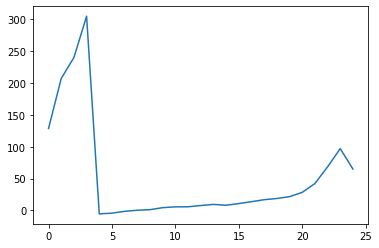

In [15]:
# Your code here

df2 = flights_df.groupby(["hour"]).mean()
plt.plot(df2.dep_delay)

 -- It seems that departure delay is lowest around 4 am, and then gradually increase from 4 am to 3am next day and is highest at 3 am.--

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [16]:
# Your code here

df2 = flights_df[["air_time", "flight", "distance"]].dropna()
df2 = df2.groupby("flight").sum()
df2["speed"] = df2["distance"]/df2["air_time"]
speed_max = df2[df2.speed == df2.speed.max()]
speed_max

,air_time,distance,speed
flight,,,
5479,166.0,1389,8.36747


 --  Flight 5479 flew the fastest. -- 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [17]:
# Your code here
flights_df["flight"] = flights_df["flight"].astype(str)
flights_df["flights"] = flights_df.carrier + flights_df.flight + " " + flights_df.dest
df = flights_df["flights"].value_counts()
df = df[df == 365]
df

VX251 LAS     365
VX413 LAX     365
AA1357 SJU    365
AA59 SFO      365
B6431 SRQ     365
DL2391 TPA    365
EV5712 IAD    365
AA181 LAX     365
AA119 LAX     365
DL2159 MCO    365
B6359 BUR     365
UA15 HNL      365
B6371 FLL     365
AA1611 MIA    365
B61783 MCO    365
VX407 LAX     365
B6219 CLT     365
B6703 SJU     365
Name: flights, dtype: int64

 -- Write your answer in English here -- 
 
 Flights that fly everyday and their destinations are on the above chart.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


                            OLS Regression Results                            
Dep. Variable:       np.log(distance)   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 6.603e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:25:52   Log-Likelihood:            -1.9863e+05
No. Observations:              327346   AIC:                         3.973e+05
Df Residuals:                  327344   BIC:                         3.973e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5903      0.005    507.447      0.0

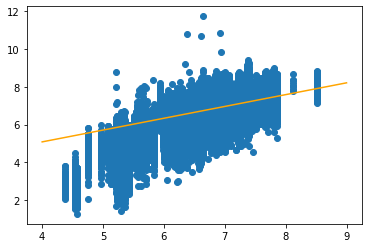

In [18]:
# Your code here

# Question: Is there a relationship between distance and speed?
flights_df["speed"] = flights_df["distance"]/flights_df["air_time"]
m = smf.ols("np.log(distance) ~ speed", data = flights_df).fit()
print(m.summary())

plt.scatter(np.log(flights_df.distance), flights_df.speed)
x = np.linspace(4,9,1000)
plt.plot(x, 2.5903 + 0.6239*x, color = "orange")


 -- Enter your discussion here --
 
 According to the summary table and plot, there seems a linear relationship between log(distance) and speed. Since R^2 is 0.669,it mean that 66.9% of variation in log(distacne) can be explained variation in speed.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_delay   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.016
Date:                Mon, 18 Jan 2021   Prob (F-statistic):              0.314
Time:                        21:25:53   Log-Likelihood:                -2057.1
No. Observations:                 360   AIC:                             4118.
Df Residuals:                     358   BIC:                             4126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5030      4.192      6.561      0.000      19.259      35.747
PRCP          17.7855     17.642      1.008      0.314     -16.909      52.480
==============================================================================
Omnibus:                      304.276   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5954.009
Skew:                           3.514   Prob(JB):                         0.00
Kurtosis:                      21.642   Cond. No.                         4.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

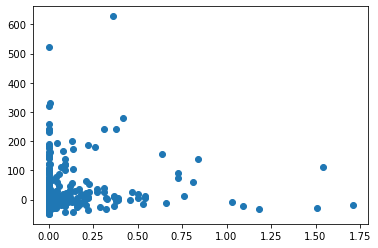

In [19]:
# Your code here

# I will investigate the relationship between delay and PRCP
weather = pd.read_csv('weather.csv')
weather["year"] = weather["DATE"].str.slice(start = 0, stop = 4)
weather = weather[weather["year"] == "2013"]

flights_df["total_delay"] = flights_df["arr_delay"] + flights_df["dep_delay"]
flights_df["date"] = flights_df["month"]*100 + flights_df["day"]
means = flights_df.groupby(["date"]).mean()
fi_wt = pd.concat([flights_df, weather], axis = 1)

plt.scatter(fi_wt.PRCP, fi_wt.total_delay)

m = smf.ols("total_delay ~  PRCP", data=fi_wt).fit()
m.summary()

-- From the chart and plot, there seems no relationship between PRCP and flight delays since R^2 is pretty small. --